In [425]:
import numpy as np
import pandas as pd


In [426]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate features
experience = np.round(np.random.uniform(0, 15, n_samples), 1)  # 0–15 years
education_levels = np.random.choice(['Bachelors', 'Masters', 'PhD'], n_samples, p=[0.5, 0.4, 0.1])
locations = np.random.choice(['New York', 'San Francisco', 'Austin', 'Berlin', 'Mumbai'], n_samples)
certifications = np.random.randint(0, 5, n_samples)  # 0 to 4 certifications
skill_match = np.round(np.random.uniform(0.5, 1.0, n_samples), 2)  # 0.5 to 1.0

# Encode education level numerically
education_map = {'Bachelors': 1, 'Masters': 2, 'PhD': 3}
education_encoded = [education_map[edu] for edu in education_levels]

# Generate salary (target) with some random noise
base_salary = (
    30000 +
    (experience * 2500) +
    (np.array(education_encoded) * 8000) +
    (certifications * 2000) +
    (skill_match * 10000) +
    np.random.normal(0, 5000, n_samples)  # Add some noise
)

# Create DataFrame
df = pd.DataFrame({
    'Experience_Years': experience,
    'Education_Level': education_levels,
    'Location': locations,
    'Certifications': certifications,
    'Skill_Match_Score': skill_match,
    'Salary': np.round(base_salary, 2)
})



In [427]:
df.head(10)

,Experience_Years,Education_Level,Location,Certifications,Skill_Match_Score,Salary
0,5.6,Masters,Berlin,2,0.75,70523.51
1,14.3,Masters,Austin,3,0.69,96173.31
2,11.0,Bachelors,Mumbai,0,0.73,60290.99
3,9.0,Masters,New York,0,0.61,66933.63
4,2.3,Masters,Mumbai,3,0.94,78632.22
5,2.3,Bachelors,New York,3,0.73,54516.95
6,0.9,PhD,San Francisco,0,0.94,53062.83
7,13.0,Masters,New York,2,0.55,80750.30
8,9.0,PhD,Berlin,4,0.99,106822.34
9,10.6,Masters,Austin,4,0.72,84185.01


In [428]:
#check missing values

df.isna().sum()
 

Experience_Years     0
Education_Level      0
Location             0
Certifications       0
Skill_Match_Score    0
Salary               0
dtype: int64

In [429]:
df.describe()

,Experience_Years,Certifications,Skill_Match_Score,Salary
count,500.000000,500.000000,500.000000,500.00000
mean,7.478600,2.056000,0.744960,73170.65108
std,4.477286,1.445352,0.148773,13596.90235
min,0.100000,0.000000,0.500000,39295.03000
25%,3.600000,1.000000,0.610000,62781.04750
50%,7.700000,2.000000,0.740000,73527.00000
75%,11.325000,3.000000,0.870000,83113.63250
max,14.900000,4.000000,1.000000,112379.68000


In [430]:
df=df.drop_duplicates()

In [431]:
df

,Experience_Years,Education_Level,Location,Certifications,Skill_Match_Score,Salary
0,5.6,Masters,Berlin,2,0.75,70523.51
1,14.3,Masters,Austin,3,0.69,96173.31
2,11.0,Bachelors,Mumbai,0,0.73,60290.99
3,9.0,Masters,New York,0,0.61,66933.63
4,2.3,Masters,Mumbai,3,0.94,78632.22
...,...,...,...,...,...,...
495,5.3,Bachelors,Berlin,1,0.70,67234.24
496,8.8,PhD,New York,3,0.95,87230.30
497,1.2,Bachelors,New York,4,0.50,49382.37
498,14.6,PhD,Mumbai,3,0.52,99906.95


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experience_Years   500 non-null    float64
 1   Education_Level    500 non-null    object 
 2   Location           500 non-null    object 
 3   Certifications     500 non-null    int32  
 4   Skill_Match_Score  500 non-null    float64
 5   Salary             500 non-null    float64
dtypes: float64(3), int32(1), object(2)
memory usage: 21.6+ KB


In [433]:
# Label Encoding: For ordinal categories here :Education_Level
# One-Hot Encoding: For nominal categories (e.g. City, Gender)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education_Level']=le.fit_transform(df['Education_Level'])


In [434]:
df

,Experience_Years,Education_Level,Location,Certifications,Skill_Match_Score,Salary
0,5.6,1,Berlin,2,0.75,70523.51
1,14.3,1,Austin,3,0.69,96173.31
2,11.0,0,Mumbai,0,0.73,60290.99
3,9.0,1,New York,0,0.61,66933.63
4,2.3,1,Mumbai,3,0.94,78632.22
...,...,...,...,...,...,...
495,5.3,0,Berlin,1,0.70,67234.24
496,8.8,2,New York,3,0.95,87230.30
497,1.2,0,New York,4,0.50,49382.37
498,14.6,2,Mumbai,3,0.52,99906.95


In [435]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [436]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#As salary is our target variable ,let's drop from features 

features=df.drop('Salary',axis=1)
features_scaled=scaler.fit_transform(features)

In [437]:
#feature selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model=LinearRegression()
rfe = RFE(model, n_features_to_select=9)
rfe.fit(features_scaled, df['Salary'])

# Selected features
selected_features = features.columns[rfe.support_]
feature_names = features.columns
ranking = rfe.ranking_

# Save the selected features
joblib.dump(selected_features.tolist(), 'selected_features.pkl')

print("Selected features from RFE:", selected_features)

Selected features from RFE: Index(['Experience_Years', 'Education_Level', 'Certifications',
       'Skill_Match_Score', 'Location_Berlin', 'Location_Mumbai',
       'Location_New York', 'Location_San Francisco'],
      dtype='object')


c:\Users\Priyanka\Machine learning- Tutorials\new-env\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=9 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


In [438]:
# Inspect selected features from RFE (should include one-hot encoded columns)
selected_features = features.columns[rfe.support_]
print(selected_features)

# If RFE selects 'Education_Level', change it to the corresponding one-hot encoded columns
# Replace 'Education_Level' with 'Education_Level_Masters' and 'Education_Level_PhD'
selected_features = selected_features.tolist()
selected_features = [col if col != 'Education_Level' else 'Education_Level_Masters' for col in selected_features]
selected_features = [col if col != 'Education_Level' else 'Education_Level_PhD' for col in selected_features]


Index(['Experience_Years', 'Education_Level', 'Certifications',
       'Skill_Match_Score', 'Location_Berlin', 'Location_Mumbai',
       'Location_New York', 'Location_San Francisco'],
      dtype='object')


In [439]:
df

,Experience_Years,Education_Level,Certifications,Skill_Match_Score,Salary,Location_Berlin,Location_Mumbai,Location_New York,Location_San Francisco
0,5.6,1,2,0.75,70523.51,True,False,False,False
1,14.3,1,3,0.69,96173.31,False,False,False,False
2,11.0,0,0,0.73,60290.99,False,True,False,False
3,9.0,1,0,0.61,66933.63,False,False,True,False
4,2.3,1,3,0.94,78632.22,False,True,False,False
...,...,...,...,...,...,...,...,...,...
495,5.3,0,1,0.70,67234.24,True,False,False,False
496,8.8,2,3,0.95,87230.30,False,False,True,False
497,1.2,0,4,0.50,49382.37,False,False,True,False
498,14.6,2,3,0.52,99906.95,False,True,False,False


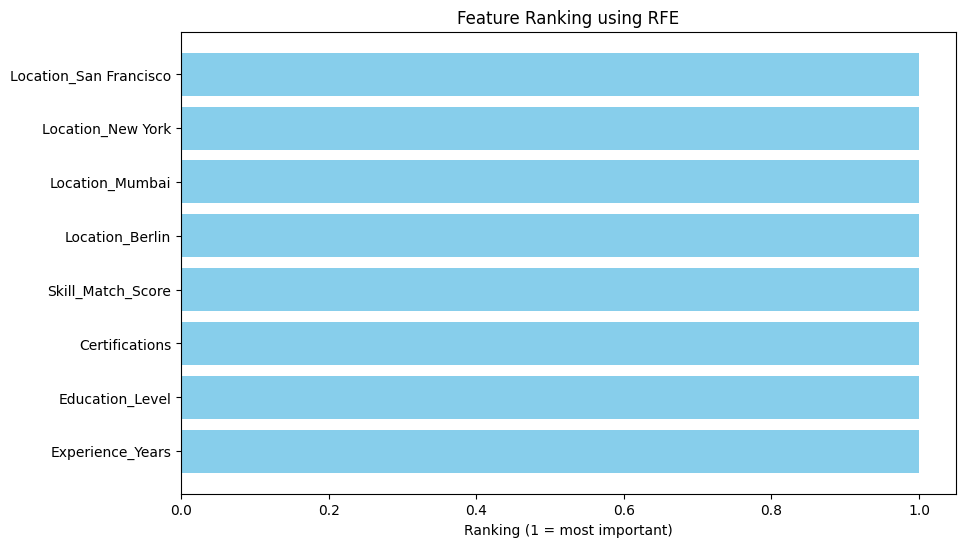

In [440]:
# Plot the feature ranking
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_names, ranking, color='skyblue')
plt.xlabel('Ranking (1 = most important)')
plt.title('Feature Ranking using RFE')
plt.show()

In [441]:
import seaborn as sns

correlation_matrix=features.corr()

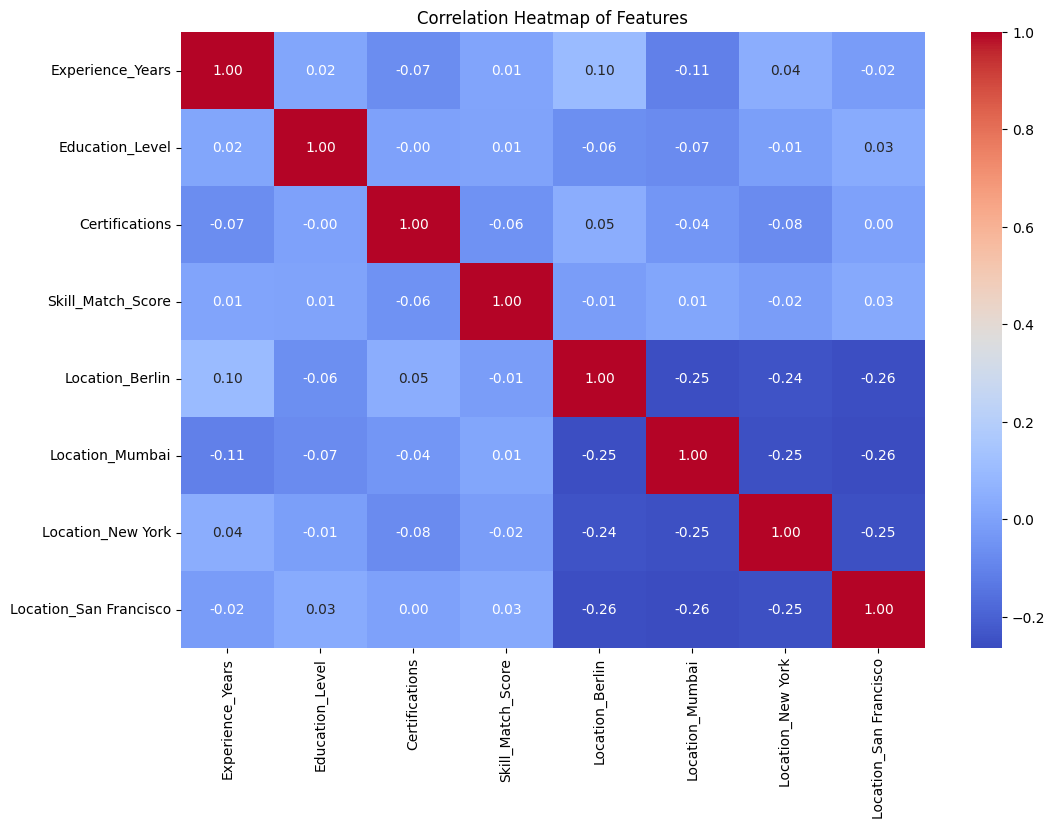

In [442]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()

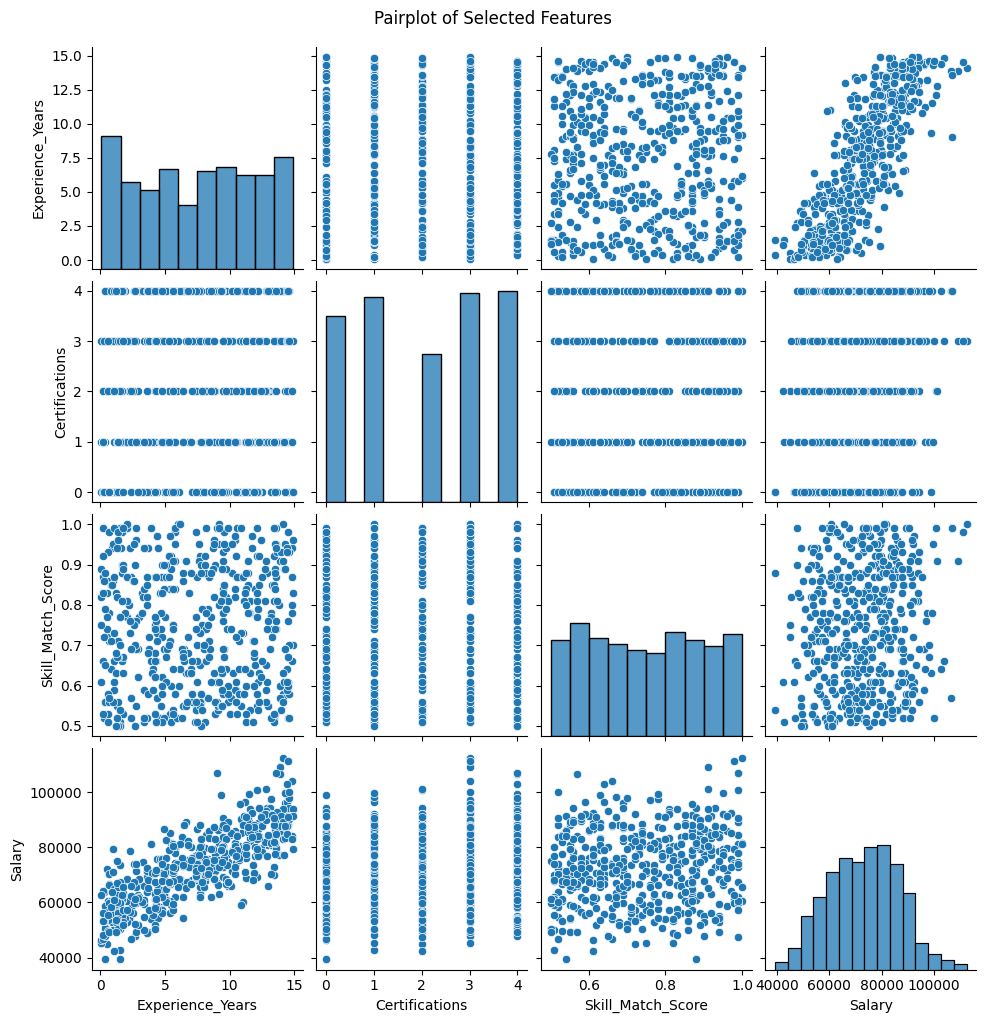

In [443]:
sns.pairplot(df[['Experience_Years', 'Certifications', 'Skill_Match_Score', 'Salary']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

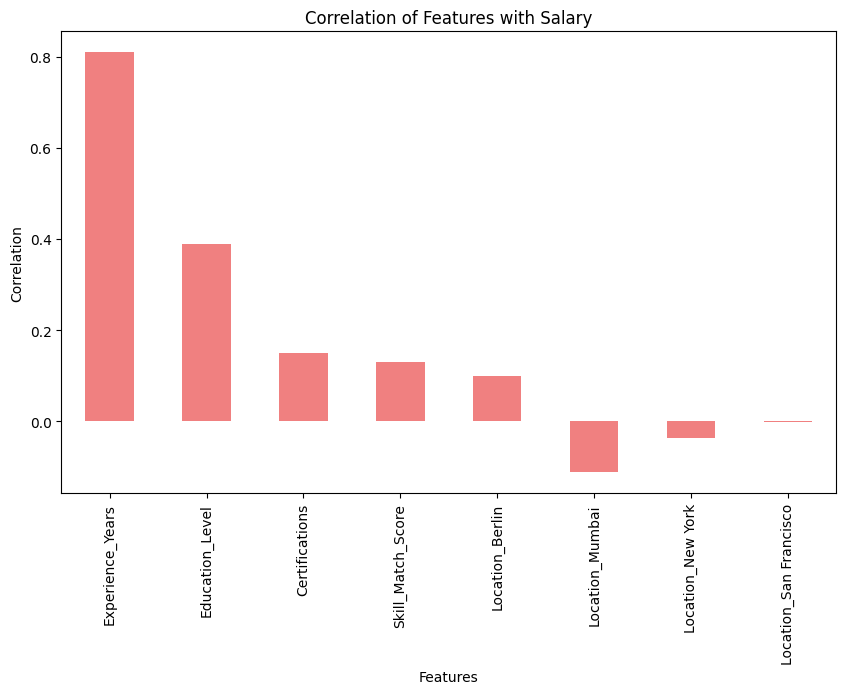

In [444]:
# Correlation with target variable 'Salary'
correlation_with_target = features.corrwith(df['Salary'])

# Plot correlation with target
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='lightcoral')
plt.title('Correlation of Features with Salary')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

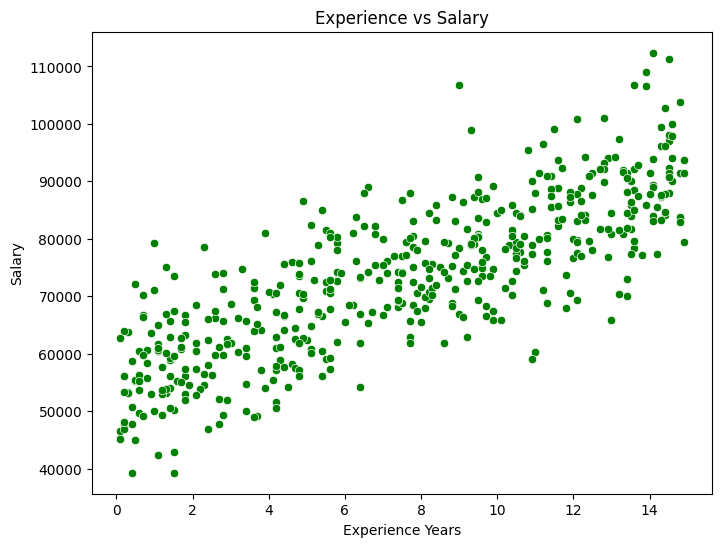

In [445]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Experience_Years'], y=df['Salary'], color='green')
plt.title('Experience vs Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

In [446]:
residuals = df['Salary'] - model.predict(features_scaled)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

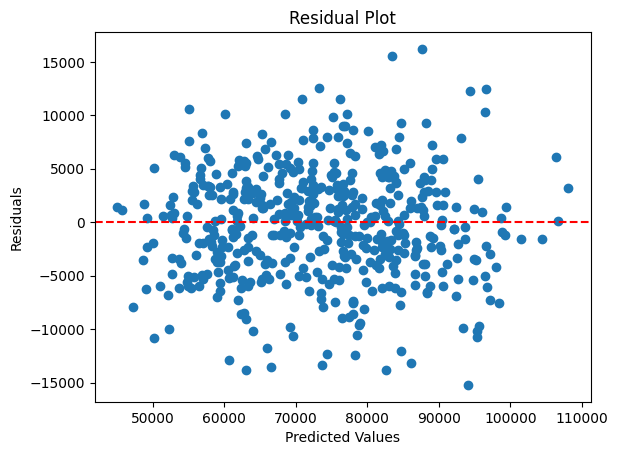

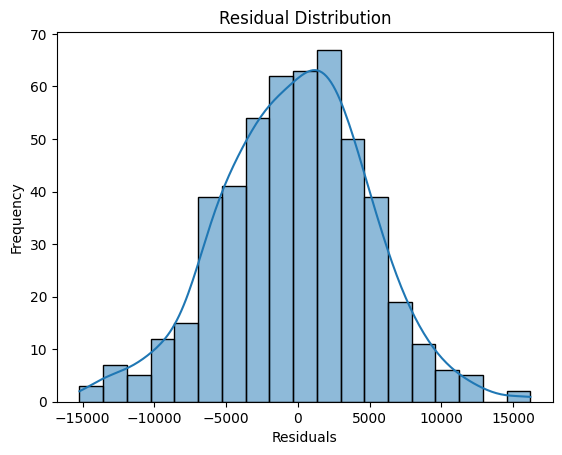

In [ ]:
# Residual plot
plt.scatter(model.predict(features_scaled), residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [ ]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_scaled,df['Salary'],test_size=0.2,random_state=42)


In [ ]:
#model training
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Model Evaluation

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=model.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8356486025586434
MAE: 4142.881517324544
RMSE: 5276.615994716301


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid = GridSearchCV(ridge, params, scoring='r2', cv=5)
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
print("Best R2 score (CV):", grid.best_score_)


Best alpha: {'alpha': 1.0}
Best R2 score (CV): 0.8523591700988474


In [ ]:
import joblib

joblib.dump(model, 'salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(features.columns[rfe.support_].tolist(), 'selected_features.pkl')


['selected_features.pkl']

In [ ]:
#